In [1]:
import tensorflow as tf
import keras
import numpy as np
import tf_explain
import skimage.io

from tf_explain.core import GradCAM
from matplotlib import pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16,decode_predictions,preprocess_input

print('Notebook running: tensorflow ', tf.__version__)
print('Notebook running: keras ', keras.__version__)
print('Notebook running: numpy ', np.__version__)


Notebook running: tensorflow  2.4.1
Notebook running: keras  2.4.3
Notebook running: numpy  1.19.5


In [2]:
#Loading model

model = tf.keras.models.load_model('C:\\Users\\samsn\\Documents\\Projects\\Thesis\\data\\model')

In [3]:
model.summary()

Model: "AkinolaVGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

This is a customized version of the VGG16 model created to recognize 3 type of objects: chimpanzee, gorilla and white tiger. This choice was made make more visible how the network works and what it "sees"

In [4]:
#setting class names

class_names={
    '0':'chimpanzee',
    '1':'gorilla',
    '2':'white_tiger'
}

In [5]:
# load an image

img = tf.keras.preprocessing.image.load_img("immagine.jpg", target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
data = ([img], None)

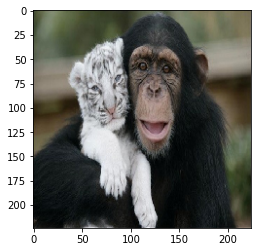

In [6]:
plt.imshow(img/255)

In [7]:
#get predictions

preds = np.round(model.predict(preprocess_input(np.expand_dims(img.copy(), axis=0))),3)
preds_data = dict(zip(class_names.values(), preds[0]))

<function matplotlib.pyplot.show(close=None, block=None)>

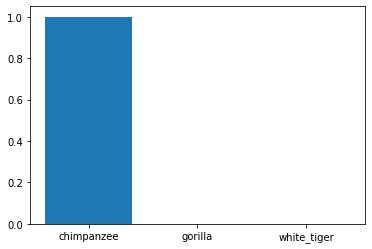

In [8]:
#plot results

plt.bar(range(len(preds_data)), list(preds_data.values()), align='center')
plt.xticks(range(len(preds_data)), list(preds_data.keys()))
plt.show

In [9]:
#setting the explainer to GradCAM

explainer = GradCAM()

In [10]:
#inspecting the 18th layer (block5_conv3) and getting an explanation

layer='block5_conv3'

grid1 = explainer.explain(data,model,layer_name=layer,use_guided_grads=0,class_index=0)  #0 is for chimpanzee
grid2 = explainer.explain(data,model,layer_name=layer,use_guided_grads=0,class_index=2)  #2 is for white_tiger

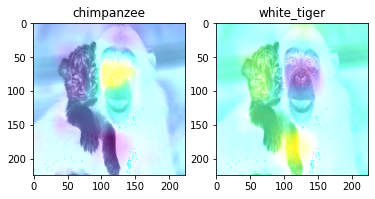

In [11]:
#plotting the results

f, axarr = plt.subplots(1,2)
plt.title('My title')
axarr[0].set_title('chimpanzee')
axarr[0].imshow(grid1)
plt.title('My title')
axarr[1].set_title('white_tiger')
axarr[1].imshow(grid2)
